### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame as df


### Importing the EDGES data

4645.468619

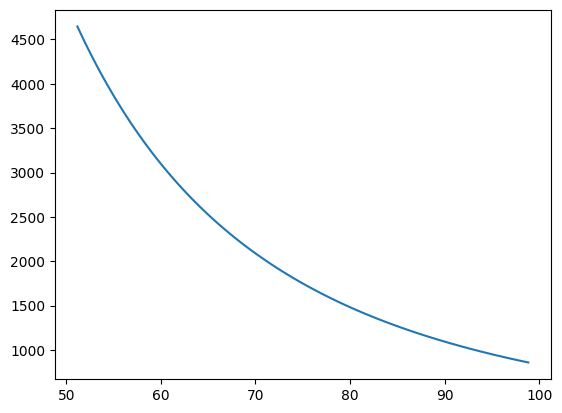

In [2]:


Tfg_edges = pd.read_csv('figure1_plotdata.csv')
Tfg_edges1 = np.array(Tfg_edges.iloc[3:126,2], dtype = np.float32)
nu1 = np.linspace(51.184082, 98.840332, 123)
plt.plot(nu1, Tfg_edges1)
Tfg_edges.iloc[3,2]

### Using Linearize form of Foreground Modelling provided in doi.org/10.1038/nature25792

In [3]:

nu0 = 78
nu1 = np.linspace(51.184082, 98.840332, 123)
z = np.zeros(5)
for nu in nu1:
  Tfg = (nu/nu0)**(-2.5)*(np.array([1,  np.log(nu/nu0), (np.log(nu/nu0))**2, (nu/nu0)**(-2), (nu/nu0)**(0.5)]))
  u = np.vstack((z,Tfg))
  z = u
  
#df(z[1:,:])#.shape

In [4]:
# define the matrix of coefficients and the vector of known values
a = z[1:,:]
b = Tfg_edges1

### Estimating the Unknown Parameters

In [5]:


# define the cost function
def cost_function(x):
    predicted = np.dot(a, x)
    return np.sum((predicted - b) ** 2)

# define the gradient of the cost function
def gradient(x):
    predicted = np.dot(a, x)
    residuals = predicted - b
    return 2 * np.dot(a.T, residuals)

# choose an initial guess for the values of the unknown parameters
x = np.zeros(5)

# set the learning rate for minimum error

learning_rate = 0.000834

# update the values of the unknown parameters using gradient descent
for i in range(1000):
    x -= learning_rate * gradient(x)

# print the solution
print(x)
print(cost_function(x)**(0.5))

[ 711.86361882   17.51107487 -183.01537859  171.65062645  699.32832116]
188.73695714927928


5001.683808120325

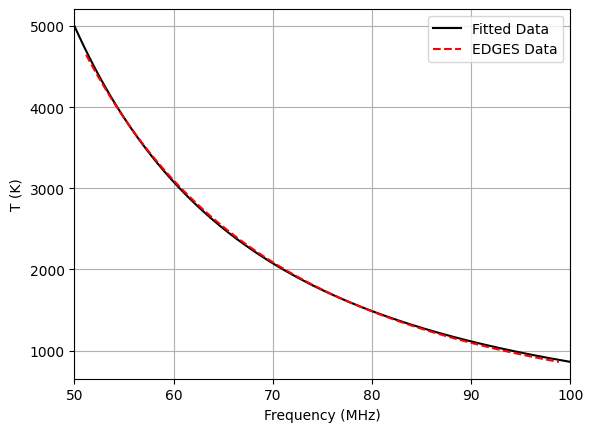

In [6]:
fig, ax = plt.subplots()
nu = np.linspace(51.184082, 98.840332, 123)
nu = np.linspace(50,100,200)
Tfg = (nu/nu0)**(-2.5)*(x[0] + x[1]* np.log(nu/nu0) +x[2]* (np.log(nu/nu0))**2 + x[3]*(nu/nu0)**(-2) + x[4]*(nu/nu0)**(0.5))

plt.plot(nu, Tfg, label = 'Fitted Data', color ='black')
plt.plot(nu1, Tfg_edges1, '--', label = 'EDGES Data', color ='red')
plt.xlim(50,100)
plt.xlabel('Frequency (MHz)')
plt.ylabel('T (K)')
plt.legend()
plt.grid()
#plt.savefig('EDGES_Tfg_fitted.pdf', dpi =  300)
Tfg[0]

(50.0, 100.0)

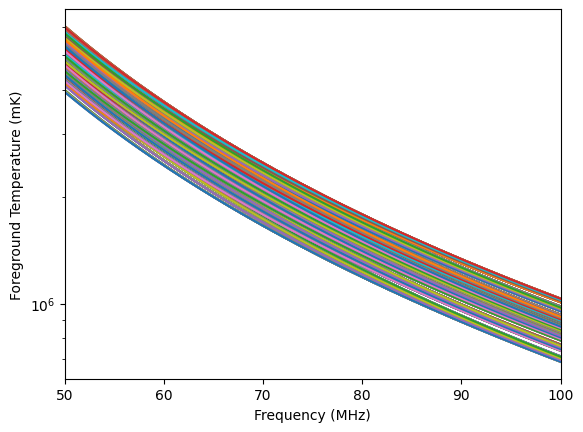

In [10]:
q = np.linspace(0.8, 1.2, 4)
x1, x2, x3, x4, x5 = x[0]*q, x[1]*q, x[2]*q, x[3]*q, x[4]*q
xy_grid = [(a,b,c,d,e) for a in range(len(q)) for b in range(len(q)) for c in range(len(q)) for d in range(len(q)) for e in range(len(q))]

for (a,b,c,d,e) in xy_grid:
  Tfg = (nu/nu0)**(-2.5)*(x1[a] + x2[b] * np.log(nu/nu0) + x3[c] * (np.log(nu/nu0))**2 + x4[d]*(nu/nu0)**(-2) + x5[e]*(nu/nu0)**(0.5))
  
  plt.plot(nu, Tfg*1e3)

plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Foreground Temperature (mK)')
plt.xlim(50,100)
plt.savefig('Foreground_cmb_100hr.pdf', )